In [ ]:
import pandas as pd

arg_20 = pd.read_csv('./data/ArgKB_20.csv')
arg_20

In [3]:
len(arg_20)

4740

In [4]:
import json

arg_20_ = []

for idx, row in arg_20.iterrows():
    arg_20_.append({
        "claim": row["Input.Claim"],
        "stance": row["Input.Stance"],
        "claim_concepts": row["Input.Tagme_concepts"],
        "claim_concepts_": row["Input.Babelfy_concepts"],
        "answer_relation": row["Answer.rel"],
        "answer_concepts": row["Answer.concept_1"],
        "answer_entities": row["Answer.concept2.entities"],
        "answer_effect": row["Answer.effect"],
        "answer_2_concepts": row["Answer.concept_2"],
        "answer_3_concepts": row["Answer.concept_3"],
        "answer_good_bad": row["Answer.GoodBad"]
    })

with open("./data/ArgKB_20.jsonl", "w", encoding='utf-8') as f:
    for i in arg_20_:
        f.write(json.dumps(i))
        f.write("\n")

In [8]:
import networkx as nx

G = nx.Graph()

arg_20_ = arg_20[["Answer.concept_1", "Answer.concept_2"]][0:20]
G = nx.from_pandas_edgelist(arg_20_, "Answer.concept_1", "Answer.concept_2")

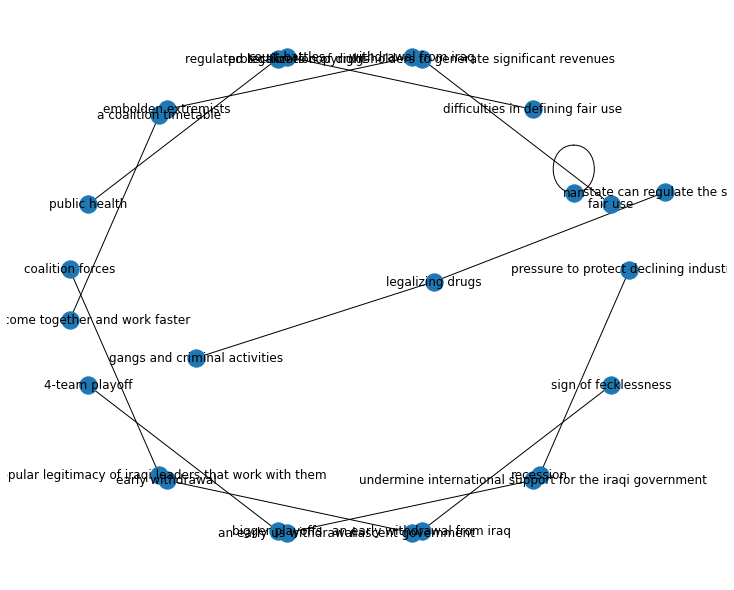

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(10,8))
nx.draw_kamada_kawai(G, with_labels=True)

In [14]:
arg_20[["Input.Babelfy_concepts", "Answer.concept_1", "Answer.concept_2", "Answer.concept_3"]]

,Input.Babelfy_concepts,Answer.concept_1,Answer.concept_2,Answer.concept_3
0,{'drug'},legalizing drugs,state can regulate the sale,"citizens, public health, state, government, pu..."
1,"{'future', 'contempt', 'iraq', 'exploitation'}",NaN,NaN,NaN
2,"{'fair use', 'tax revenue'}",fair use,protection to copyright-holders to generate si...,"copyright holders, tax payers, copyright holders"
3,"{'evidence', 'time'}",NaN,NaN,NaN
4,{'fair use'},difficulties in defining fair use,court-battles,"courts, companies, courts, users, courts, comp..."
...,...,...,...,...
4735,"{'area', 'tourism', 'administrative divisions ...",tourism,income to a particular area or country,"national economy, employees, area, economy, ar..."
4736,"{'proletariat', 'chain', 'hotel'}",NaN,NaN,NaN
4737,"{'mental image', 'development economics', 'tou...",tourism demands,modernisation or inhabitants,"travel, economy, world connection, society, cu..."
4738,"{'building', 'tourism', 'conservation (cultura...",geographically separating tourism related buil...,conservation,"cultural heritage, society, city, economy, tou..."


In [27]:
arg_concepts = arg_20["Answer.concept_3"]
concepts = []

for i in arg_concepts:
    if pd.isna(i):
        continue

    else:
        for j in i.split(","):
            concepts.append(str(j.strip()))

len(concepts)
concepts

['citizens',
 'public health',
 'state',
 'government',
 'public safety',
 'taxes',
 'budgets',
 'sales',
 'copyright holders',
 'tax payers',
 'copyright holders',
 'courts',
 'companies',
 'courts',
 'users',
 'courts',
 'companies',
 'iraqis',
 'moderates',
 'most of the population',
 'moderates',
 'public health',
 'society',
 'individuals',
 'society',
 'the general public',
 'society',
 'public',
 'citizens',
 'iraqi leaders',
 'the iraqi leaders',
 'iraqi leaders',
 'iraqi government and citizens',
 'iraq',
 'iraqi government',
 'iraqi government',
 'iraqis',
 'the world',
 'iraqi government',
 'iraq',
 'us',
 'enemies of the us',
 'image of the us',
 'network owners',
 'customers',
 'network owners',
 'network owners',
 'network owners',
 'us allies',
 'us citizens',
 'us government',
 'worsened moral credibility is bad for other countries in judging the actions of the united states.  allies may frown upon the us and have a less trusting relationship.',
 'the united states',
 '

In [29]:
concepts_ = set()

for i in concepts:
    if i == "":
        continue
    else:
        concepts_.add(i)

concepts_
#len(concepts_)



# with open("./data/concepts.txt", "w", encoding='utf-8') as f:
#     for i in concepts_:
#         f.write(f"{i}\n")

{'implementation',
 'crossers',
 'smaller states in the us',
 'catching offenders',
 'social security',
 'landscape',
 'vehicle',
 'compulsory',
 'us allies',
 'creative industries',
 'those who failed to ratify the convention',
 'eliminating wasting',
 'gas consumers',
 'taxpayer',
 'recovery after disaster',
 'liquidity',
 'business/corporations',
 'not wasting money',
 'perception of police',
 'country the tyrant is ruling',
 'the prevention of sexually transmitted diseases.',
 'us military',
 'america',
 'wildlife refuge',
 'crime and injury victims',
 'new students and parents',
 'goverments',
 'circumcised boys',
 'trans fat shelf life',
 'food production',
 'circumcised men',
 "children's mental health",
 'european heritage',
 'families of the deceased',
 'fewer rights/protections',
 'asean countries and its people',
 'unjust',
 'churchgoers',
 'the concept is good because it shows positive results of video games in the concentration',
 'market experts',
 'bureaucracy and the pe

In [38]:
concepts = list(concepts_)
concepts

['implementation',
 'crossers',
 'smaller states in the us',
 'catching offenders',
 'social security',
 'landscape',
 'vehicle',
 'compulsory',
 'us allies',
 'creative industries',
 'those who failed to ratify the convention',
 'eliminating wasting',
 'gas consumers',
 'taxpayer',
 'recovery after disaster',
 'liquidity',
 'business/corporations',
 'not wasting money',
 'perception of police',
 'country the tyrant is ruling',
 'the prevention of sexually transmitted diseases.',
 'us military',
 'america',
 'wildlife refuge',
 'crime and injury victims',
 'new students and parents',
 'goverments',
 'circumcised boys',
 'trans fat shelf life',
 'food production',
 'circumcised men',
 "children's mental health",
 'european heritage',
 'families of the deceased',
 'fewer rights/protections',
 'asean countries and its people',
 'unjust',
 'churchgoers',
 'the concept is good because it shows positive results of video games in the concentration',
 'market experts',
 'bureaucracy and the pe

In [39]:
concept_desc = dict((k, {}) for k in concepts)
concept_desc

{'implementation': {},
 'crossers': {},
 'smaller states in the us': {},
 'catching offenders': {},
 'social security': {},
 'landscape': {},
 'vehicle': {},
 'compulsory': {},
 'us allies': {},
 'creative industries': {},
 'those who failed to ratify the convention': {},
 'eliminating wasting': {},
 'gas consumers': {},
 'taxpayer': {},
 'recovery after disaster': {},
 'liquidity': {},
 'business/corporations': {},
 'not wasting money': {},
 'perception of police': {},
 'country the tyrant is ruling': {},
 'the prevention of sexually transmitted diseases.': {},
 'us military': {},
 'america': {},
 'wildlife refuge': {},
 'crime and injury victims': {},
 'new students and parents': {},
 'goverments': {},
 'circumcised boys': {},
 'trans fat shelf life': {},
 'food production': {},
 'circumcised men': {},
 "children's mental health": {},
 'european heritage': {},
 'families of the deceased': {},
 'fewer rights/protections': {},
 'asean countries and its people': {},
 'unjust': {},
 'chu

In [40]:
# Topics, Descriptions
import wikipedia

for i in concepts:
    try:
        res = wikipedia.search(str(i))

    except (wikipedia.exceptions.WikipediaException, wikipedia.exceptions.PageError):
        continue

    try:
        concept_desc[i].update({"description": wikipedia.page(res[0]).summary})

    except (wikipedia.exceptions.WikipediaException, wikipedia.exceptions.PageError):
        continue

/Users/joshua.sheppard/Library/Mobile Documents/com~apple~CloudDocs/counta_bot/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/joshua.sheppard/Library/Mobile Documents/com~apple~CloudDocs/counta_bot/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


KeyboardInterrupt: 

In [ ]:
# Google Knowledge Graph

